## Import Labraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load Dataset

In [2]:
df=pd.read_csv(r'E:\Data Set\Virat Kohli DataSet.csv')

In [3]:
df.shape

(132, 11)

In [4]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [6]:
df.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Data Cleaning

In [8]:
df['Pos'].unique()

array([2., 1., 7., 4., 3., 5., 6.])

In [9]:
df['Pos']=df['Pos'].astype('int64')

In [10]:
df['Opposition'].unique()

array(['v Sri Lanka', 'v Australia', 'v Bangladesh', 'v South Africa',
       'v Zimbabwe', 'v New Zealand', 'v Ireland', 'v Netherlands',
       'v West Indies', 'v Pakistan', 'v England'], dtype=object)

In [11]:
df['Opposition']=df['Opposition'].str.replace('v ','')

In [12]:
df['Start Date']=pd.to_datetime(df['Start Date'])

C:\Users\rohit\AppData\Local\Temp\ipykernel_15348\2582895649.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start Date']=pd.to_datetime(df['Start Date'])


In [13]:
df['Month']=df['Start Date'].dt.month

In [14]:
df['Year']=df['Start Date'].dt.year

In [15]:
df['Ground'].unique()

array(['Dambulla', 'Colombo (RPS)', 'Vadodara', 'Mohali', 'Rajkot',
       'Nagpur', 'Kolkata', 'Dhaka', 'Jaipur', 'Ahmedabad', 'Bulawayo',
       'Harare', 'Visakhapatnam', 'Guwahati', 'Bengaluru', 'Chennai',
       'Durban', 'Johannesburg', 'Cape Town', 'Port Elizabeth',
       'Centurion', 'Delhi', 'Mumbai', 'Port of Spain', 'North Sound',
       'Kingston', 'Southampton', 'The Oval', 'Cardiff',
       'Hyderabad (Deccan)', 'Cuttack', 'Indore', 'Melbourne', 'Adelaide',
       'Brisbane', 'Sydney', 'Hambantota', 'Pallekele', 'Kochi', 'Ranchi',
       'Dharamsala', 'Birmingham', 'Pune', 'Kanpur', 'Napier', 'Hamilton',
       'Wellington', 'Fatullah', 'Nottingham', 'Leeds', 'Perth',
       'Canberra'], dtype=object)

## EDA

#### 1) Dismissal in ODI Match

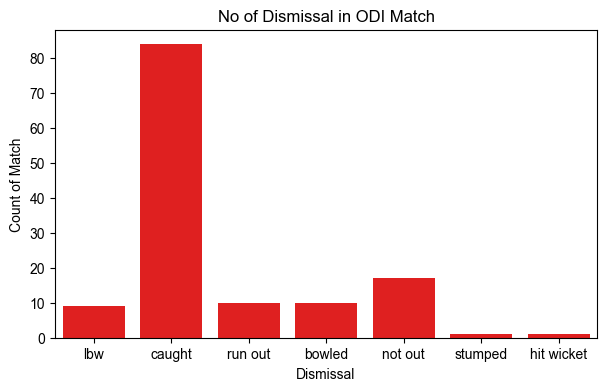

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(x="Dismissal",data=df,color="red")
plt.ylabel("Count of Match")
plt.title("No of Dismissal in ODI Match")
plt.yticks([i for i in range(0,90,10)])
sns.set_style(style="dark")
plt.savefig("No of Dismissal in ODI Match.jpg")
plt.show()

### 2) No of Opposition Team Face in ODI Match

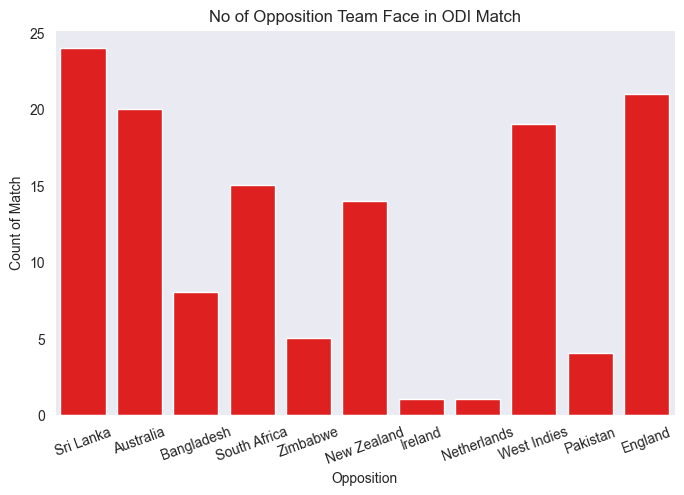

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="Opposition",data=df,color="red")
plt.xticks(rotation=20)
plt.ylabel("Count of Match")
plt.title("No of Opposition Team Face in ODI Match")
plt.yticks([i for i in range(0,30,5)])
sns.set_style(style="dark")
# plt.savefig("No of Opposition Team Face in ODI Match.jpg")
plt.show()

### 3)How are different teams getting dismissed, and what are the most common types of dismissals for each team?

In [31]:
print(df['Opposition'].unique())
team_name=input('Enter a Team Name : ')
df[df['Opposition']==team_name]['Dismissal'].value_counts()

['Sri Lanka' 'Australia' 'Bangladesh' 'South Africa' 'Zimbabwe'
 'New Zealand' 'Ireland' 'Netherlands' 'West Indies' 'Pakistan' 'England']


Series([], Name: count, dtype: int64)

In [32]:
pd.crosstab(df['Dismissal'],df['Opposition'])

Opposition,Australia,Bangladesh,England,Ireland,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwe
Dismissal,,,,,,,,,,,
bowled,0,3,1,0,1,0,1,0,2,2,0
caught,15,2,14,0,0,11,3,12,13,11,3
hit wicket,0,0,1,0,0,0,0,0,0,0,0
lbw,1,1,1,0,0,0,0,0,4,2,0
not out,2,2,4,0,0,3,0,1,3,1,1
run out,2,0,0,1,0,0,0,2,2,2,1
stumped,0,0,0,0,0,0,0,0,0,1,0


### 4) 1st innings or 2nd innings play effecatively?

In [33]:
x=df['Inns'].value_counts().index
y=df['Inns'].value_counts().values

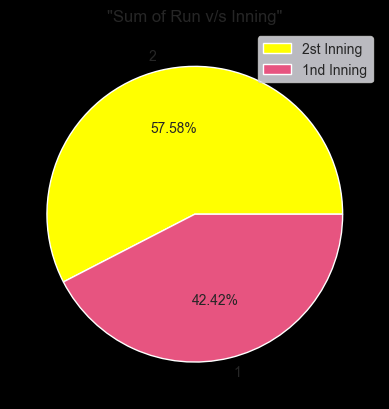

In [42]:
plt.pie(y,labels=x,colors=['yellow','#e75480'],autopct='%0.2f%%')
plt.title('"Sum of Run v/s Inning"')
plt.legend(['2st Inning','1nd Inning'])
plt.gcf().set_facecolor('Black') 

### 5) Which Position are ideal for playing cricket?

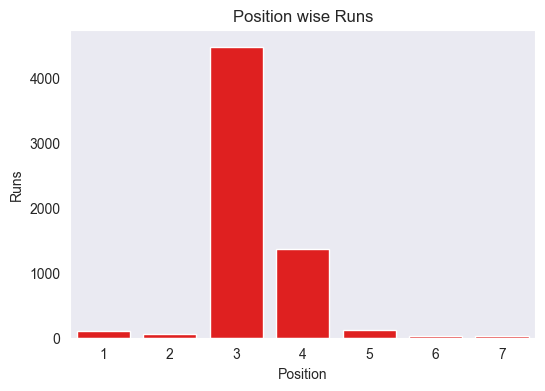

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pos',y='Runs',data=df,estimator='sum',color='red',errorbar=('ci',0))
plt.title('Position wise Runs')
sns.set_style(style="dark")
plt.xlabel('Position')
plt.show()

### 6) Which month more runs?

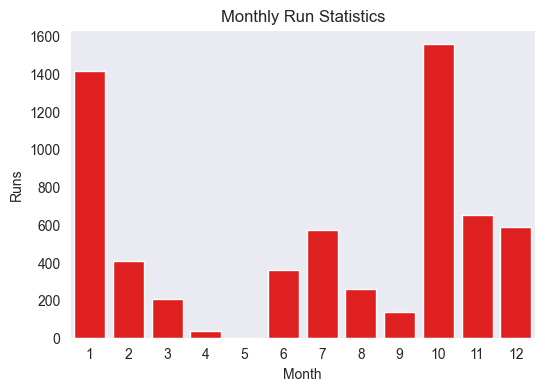

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Runs',data=df,errorbar=('ci',0),color='red',estimator='sum')
plt.title('Monthly Run Statistics')
plt.xlabel('Month')
plt.ylabel('Runs')
plt.show()

### 7) Avarage Strick Rate

In [37]:
df['SR'].mean()

76.99121212121213

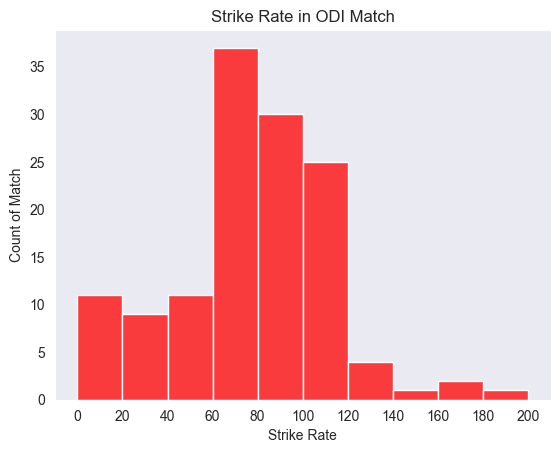

In [38]:
sns.histplot(x="SR",data=df,bins=[i for i in range(0,220,20)],color="red")
plt.xticks([i for i in range(0,220,20)])
plt.title("Strike Rate in ODI Match")
plt.xlabel("Strike Rate")
plt.ylabel("Count of Match")
sns.set_style(style="dark")
plt.savefig("Strike Rate in ODI Match.jpg")
plt.show()

### 8) Balls and Runs correlation

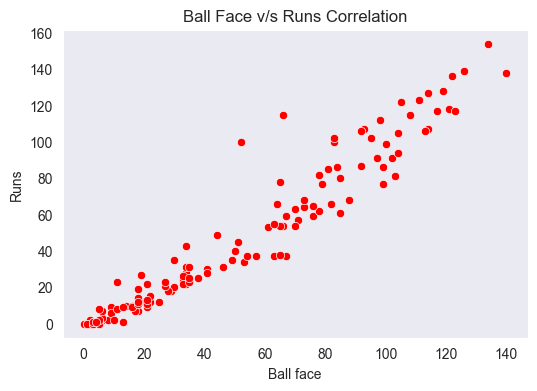

In [39]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='BF',y='Runs',data=df,color='red')
plt.xlabel('Ball face')
plt.title("Ball Face v/s Runs Correlation")
sns.set_style(style="dark")
plt.show()

### 9) Runs in between 4s and 6s?


Text(0.5, 1.0, 'Ball Face v/s 4s,6s Correlation')

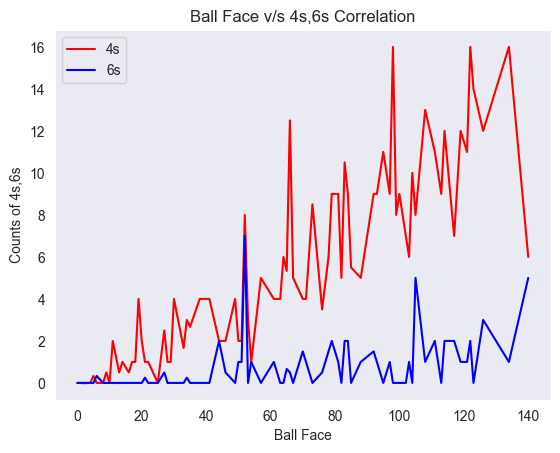

In [55]:
sns.lineplot(x='BF',y='4s',data=df,color='red',label='4s',errorbar=('ci',0))
sns.lineplot(x='BF',y='6s',data=df,color='blue',label='6s',errorbar=('ci',0))
plt.ylabel("Counts of 4s,6s")
plt.xlabel("Ball Face")
plt.title("Ball Face v/s 4s,6s Correlation")


In [51]:
sum_runs_based_on_grounds=df.groupby(['Ground'])['Runs'].sum()
top_ground=sum_runs_based_on_grounds.nlargest(10)

Text(0.5, 1.0, 'Ball Face v/s 4s,6s Correlation')

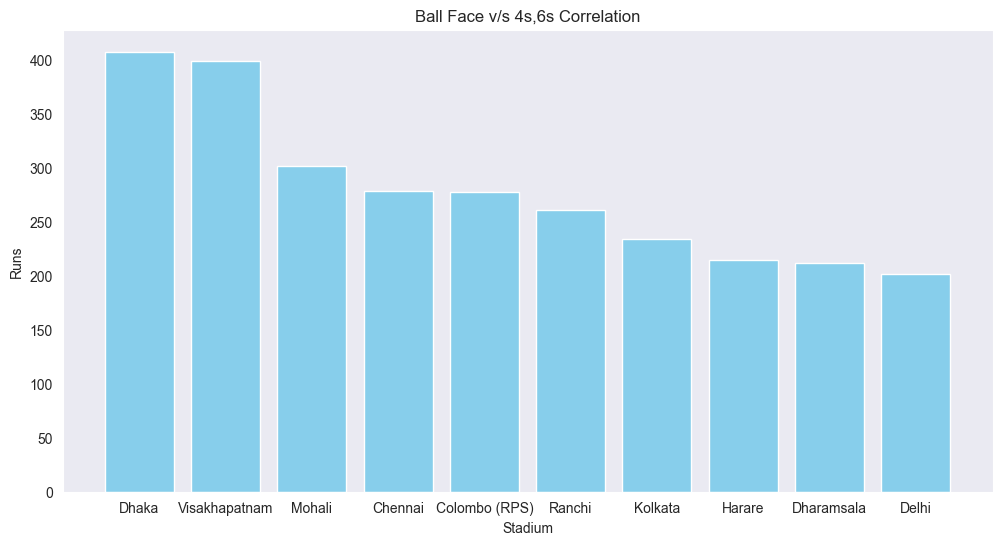

In [56]:
plt.figure(figsize=(12,6))
plt.bar(top_ground.index,top_ground.values, color='skyblue')
plt.ylabel("Runs")
plt.xlabel("Stadium")
plt.title("Ball Face v/s 4s,6s Correlation")

In [28]:
# df['Ground']['Dismissal'].value_counts()

In [29]:
# df['Dismissal'].value_counts(df['Ground'])

In [30]:
# df[df['Dismissal'] == 1]['Ground'].value_counts()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'E:\Data Set\Virat Kohli DataSet.csv')

# Display basic information about the dataset
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())
print(f"Number of duplicate entries: {df.duplicated().sum()}")

# Data Cleaning
# Convert 'Pos' column to integer
df['Pos'] = df['Pos'].astype('int64')

# Clean 'Opposition' column
df['Opposition'] = df['Opposition'].str.replace('v ', '', regex=False)

# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract month and year from 'Start Date'
df['Month'] = df['Start Date'].dt.month
df['Year'] = df['Start Date'].dt.year

# Exploratory Data Analysis (EDA)

# 1) Dismissal in ODI Match
plt.figure(figsize=(7, 4))
sns.countplot(x="Dismissal", data=df, color="red")
plt.ylabel("Count of Matches")
plt.title("Number of Dismissals in ODI Matches")
plt.yticks(range(0, 90, 10))
sns.set_style("dark")
plt.savefig("Number_of_Dismissals_in_ODI_Matches.jpg")
plt.show()

# 2) Number of Opposition Teams Faced in ODI Matches
plt.figure(figsize=(8, 5))
sns.countplot(x="Opposition", data=df, color="red")
plt.xticks(rotation=20)
plt.ylabel("Count of Matches")
plt.title("Number of Opposition Teams Faced in ODI Matches")
plt.yticks(range(0, 30, 5))
sns.set_style("dark")
plt.show()

# 3) Dismissal Types Against Specific Team
team_name = input('Enter a Team Name: ')
print(df[df['Opposition'] == team_name]['Dismissal'].value_counts())

# Cross-tabulation of Dismissal Types and Opposition Teams
pd.crosstab(df['Dismissal'], df['Opposition'])

# 4) First Innings vs. Second Innings
inns_counts = df['Inns'].value_counts()
plt.pie(inns_counts.values, labels=inns_counts.index, colors=['yellow', '#e75480'], autopct='%0.2f%%')
plt.title('"Sum of Runs vs. Innings"')
plt.legend(['2nd Innings', '1st Innings'])
plt.gcf().set_facecolor('Black')
plt.show()

# 5) Runs by Position
plt.figure(figsize=(6, 4))
sns.barplot(x='Pos', y='Runs', data=df, estimator='sum', color='red', errorbar=('ci', 0))
plt.title('Position-wise Runs')
plt.xlabel('Position')
plt.show()

# 6) Monthly Run Statistics
plt.figure(figsize=(6, 4))
sns.barplot(x='Month', y='Runs', data=df, errorbar=('ci', 0), color='red', estimator='sum')
plt.title('Monthly Run Statistics')
plt.xlabel('Month')
plt.ylabel('Runs')
plt.show()

# 7) Average Strike Rate
plt.figure(figsize=(6, 4))
sns.histplot(x="SR", data=df, bins=range(0, 220, 20), color="red")
plt.xticks(range(0, 220, 20))
plt.title("Strike Rate in ODI Matches")
plt.xlabel("Strike Rate")
plt.ylabel("Count of Matches")
sns.set_style("dark")
plt.savefig("Strike_Rate_in_ODI_Matches.jpg")
plt.show()

# Ball Face vs. Runs Correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BF', y='Runs', data=df, color='red')
plt.xlabel('Balls Faced')
plt.title("Balls Faced vs. Runs Correlation")
sns.set_style("dark")
plt.show()

# Ball Face vs. 4s and 6s Correlation
plt.figure(figsize=(6, 4))
sns.lineplot(x='BF', y='4s', data=df, color='red', label='4s', errorbar=('ci', 0))
sns.lineplot(x='BF', y='6s', data=df, color='blue', label='6s', errorbar=('ci', 0))
plt.ylabel("Counts of 4s and 6s")
plt.xlabel("Balls Faced")
plt.title("Balls Faced vs. 4s and 6s Correlation")
plt.legend()
plt.show()
